### Study Case I: Wine classification

In [30]:
library(car)
library(rattle)
library(tidyverse)
data(wine)
attach(wine)
head(wine)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()
The following objects are masked from wine (pos = 12):

    Alcalinity, Alcohol, Ash, Color, Dilution, Flavanoids, Hue,
    Magnesium, Malic, Nonflavanoids, Phenols, Proanthocyanins, Proline,
    Type

The following objects are masked from wine (pos = 13):

    Alcalinity, Alcohol, Ash, Colo

Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [35]:
col <- c('Alcohol', 'Malic', 'Ash')
subset <- wine %>% select(col)
print(paste(class(subset), typeof(subset)))
print(dim(subset))

[1] "data.frame list"
[1] 178   3


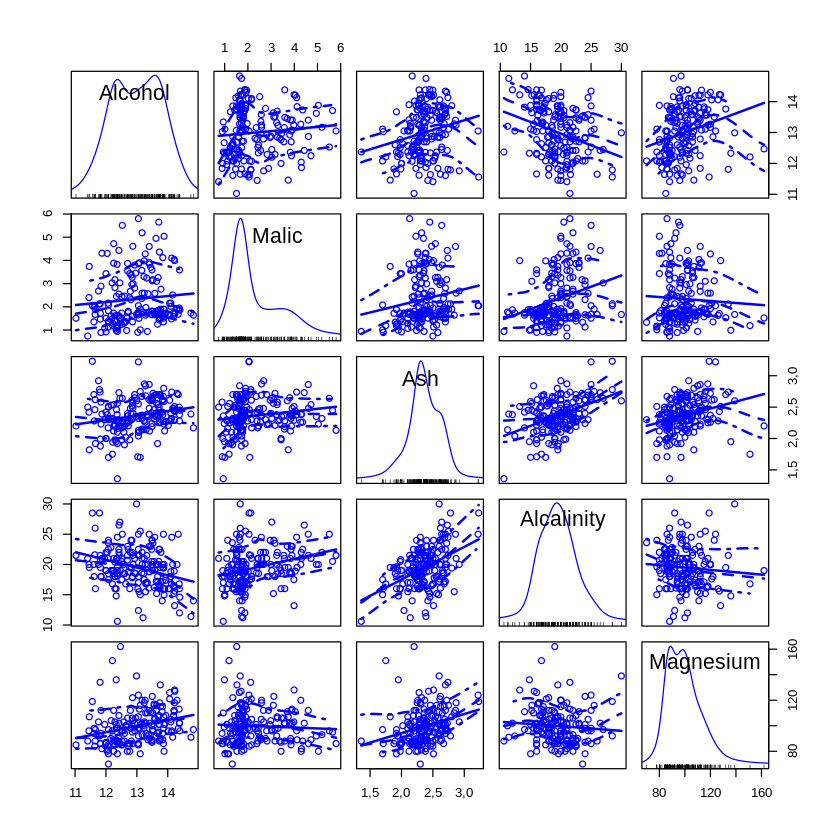

In [33]:
scatterplotMatrix(wine[2:6])

In [36]:
library(MASS)
wine.lda <- lda(Type ~ ., data=wine)


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [37]:
wine.lda

Call:
lda(Type ~ ., data = wine)

Prior probabilities of groups:
        1         2         3 
0,3314607 0,3988764 0,2696629 

Group means:
   Alcohol    Malic      Ash Alcalinity Magnesium  Phenols Flavanoids
1 13,74475 2,010678 2,455593   17,03729  106,3390 2,840169  2,9823729
2 12,27873 1,932676 2,244789   20,23803   94,5493 2,258873  2,0808451
3 13,15375 3,333750 2,437083   21,41667   99,3125 1,678750  0,7814583
  Nonflavanoids Proanthocyanins    Color       Hue Dilution   Proline
1      0,290000        1,899322 5,528305 1,0620339 3,157797 1115,7119
2      0,363662        1,630282 3,086620 1,0562817 2,785352  519,5070
3      0,447500        1,153542 7,396250 0,6827083 1,683542  629,8958

Coefficients of linear discriminants:
                         LD1           LD2
Alcohol         -0,403399781  0,8717930699
Malic            0,165254596  0,3053797325
Ash             -0,369075256  2,3458497486
Alcalinity       0,154797889 -0,1463807654
Magnesium       -0,002163496 -0,0004627565
Ph

**A Stacked Histogram of the LDA Values**

A nice way of displaying the results of a linear discriminant analysis (LDA) is to make a stacked histogram of the values of the discriminant function for the samples from different groups (different wine cultivars in our example).

We can do this using the “ldahist()” function in R. For example, to make a stacked histogram of the first discriminant function’s values for wine samples of the three different wine cultivars, we type:

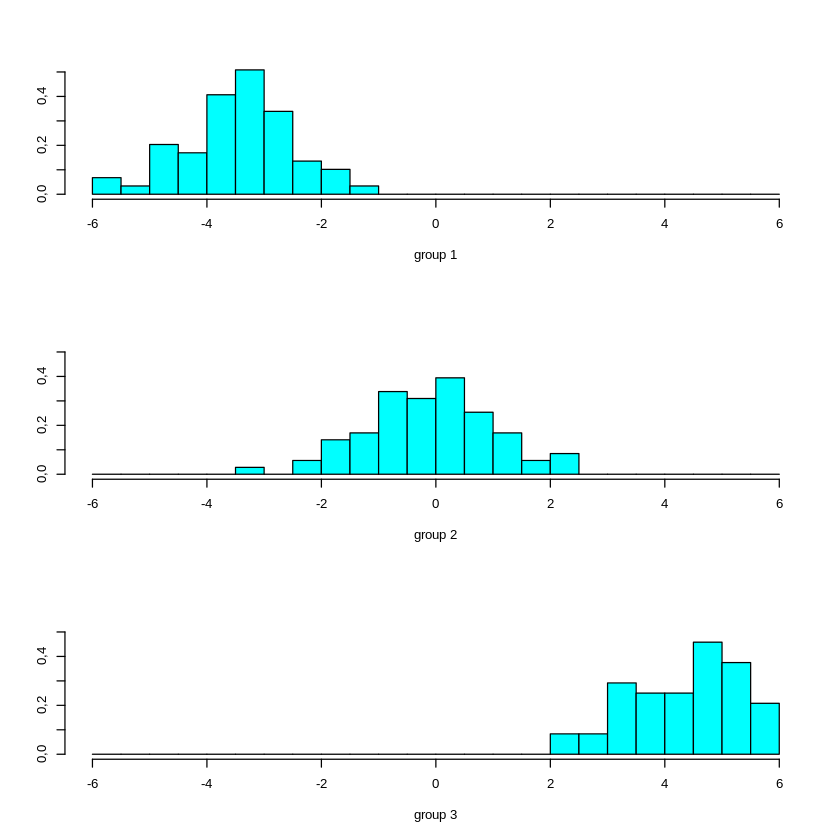

In [38]:
wine.lda.values <- predict(wine.lda)
ldahist(data = wine.lda.values$x[,1], g=Type)

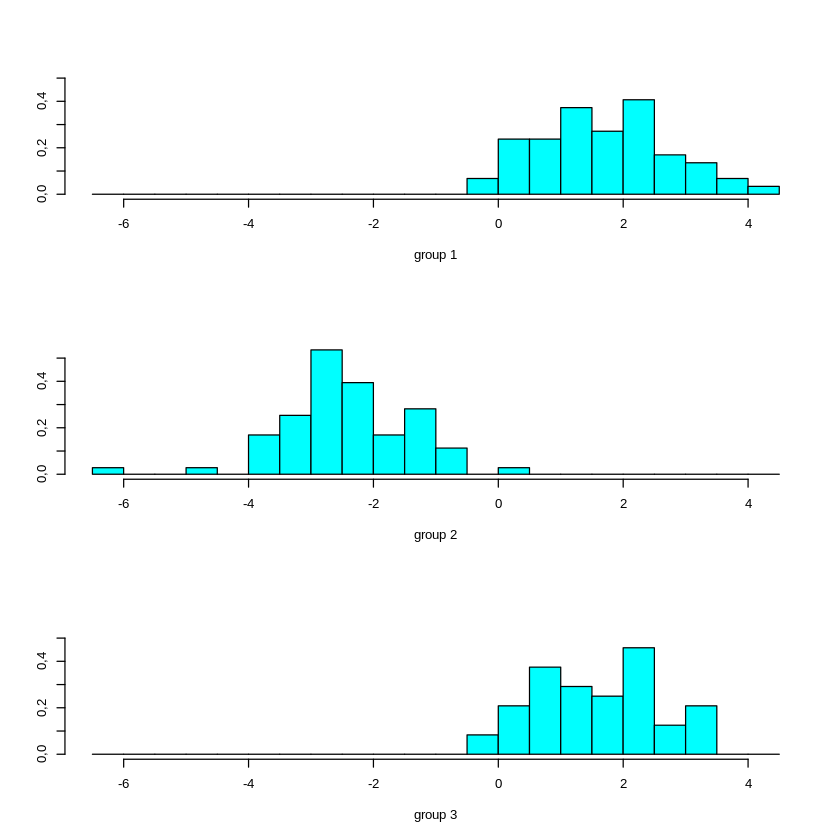

In [39]:
ldahist(data = wine.lda.values$x[,2], g=Type)

**Scatterplots of the Discriminant Functions**

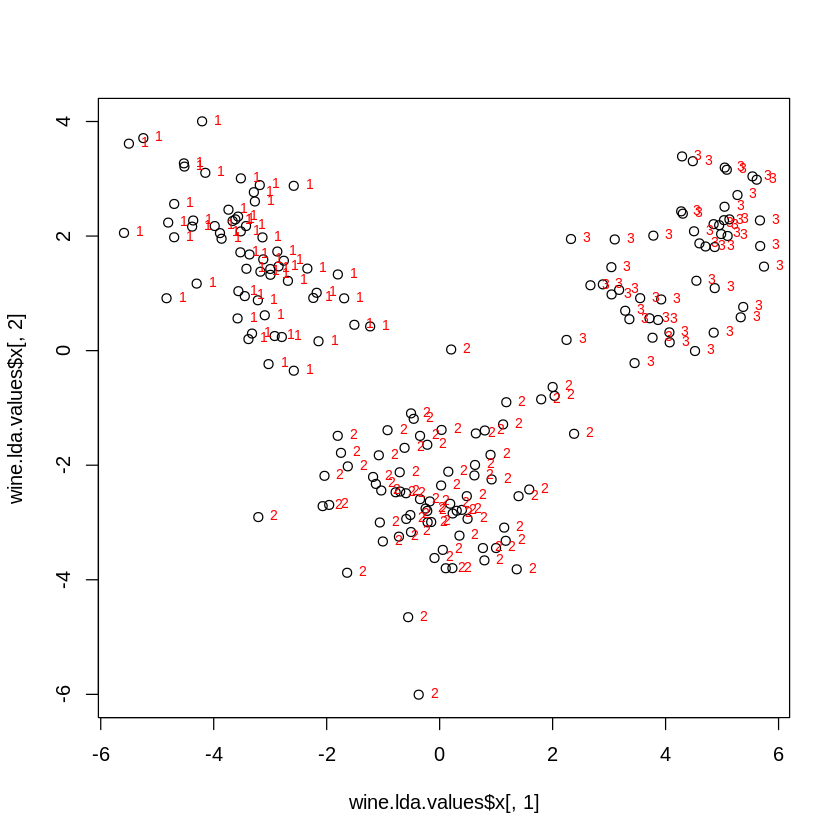

In [40]:
plot(wine.lda.values$x[,1],wine.lda.values$x[,2]) # make a scatterplot
text(wine.lda.values$x[,1],wine.lda.values$x[,2],Type,cex=0.7,pos=4,col="red") # add labels

discriminant functions, we can see that the wines from the three cultivars are well separated in the scatterplot. The first discriminant function (x-axis) separates cultivars 1 and 3 very well, but doesn’t not perfectly separate cultivars 1 and 3, or cultivars 2 and 3.

The second discriminant function (y-axis) achieves a fairly good separation of cultivars 1 and 3, and cultivars 2 and 3, although it is not totally perfect.

To achieve a very good separation of the three cultivars, it would be best to use both the first and second discriminant functions together, since the first discriminant function can separate cultivars 1 and 3 very well, and the second discriminant function can separate cultivars 1 and 2, and cultivars 2 and 3, reasonably well. ### 

### Study Case II: MBA admission data